<a href="https://colab.research.google.com/github/omniaahmed55/ML/blob/main/spotify_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gauthamvijayaraj_spotify_tracks_dataset_updated_every_week_path = kagglehub.dataset_download('gauthamvijayaraj/spotify-tracks-dataset-updated-every-week')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv('/kaggle/input/spotify-tracks-dataset-updated-every-week/spotify_tracks.csv')

In [ ]:
df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


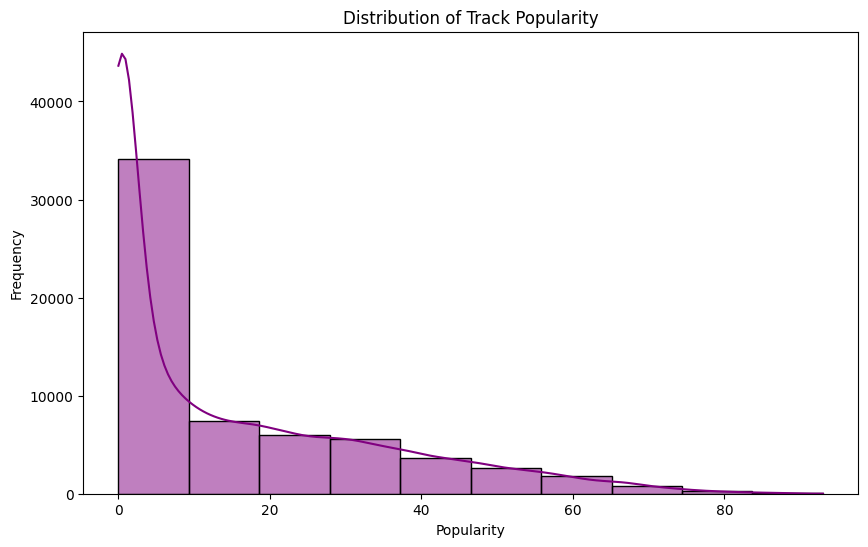

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=10, kde=True, color='purple')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['popularity']

0        59
1        47
2        35
3        24
4        22
         ..
62312    30
62313    30
62314    18
62315     1
62316     1
Name: popularity, Length: 62317, dtype: int64

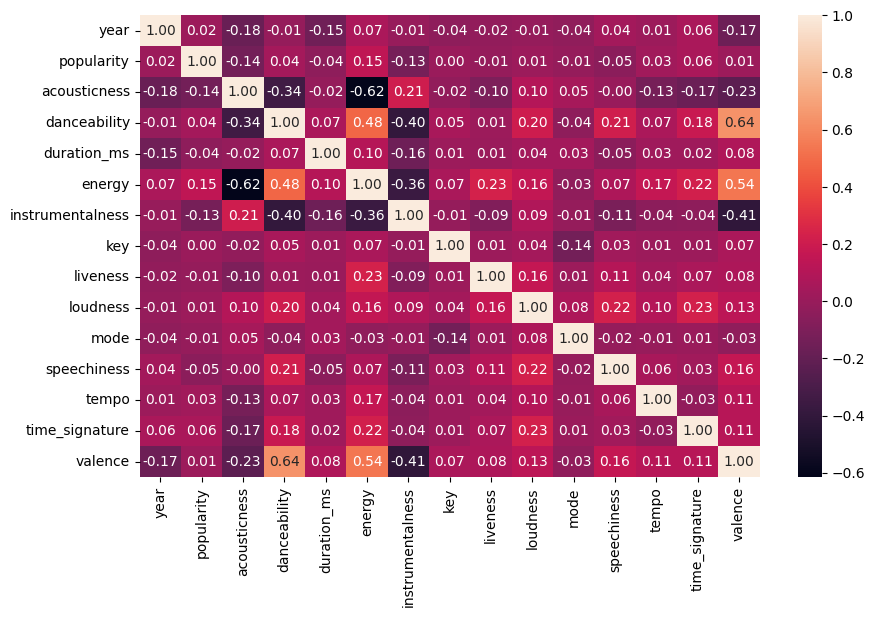

In [ ]:
numeric_data=df.select_dtypes(include=[np.number])
cor=numeric_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,fmt='.2f')
plt.show()


In [ ]:
numeric_data = numeric_data.drop_duplicates()

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data=numeric_data.fillna(0)

In [ ]:
scaler = MinMaxScaler()
numeric_data = scaler.fit_transform(numeric_data)
numeric_data = pd.DataFrame(numeric_data, columns=numeric_columns.columns)
numeric_data

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1.000000,0.634409,0.513076,0.882679,0.020168,0.9850,0.527914,0.750000,0.550551,0.999928,0.5,0.563042,0.464776,0.833333,0.731328
1,1.000000,0.505376,0.543637,0.896274,0.044219,0.8965,0.500250,0.916667,0.548098,0.999931,0.5,0.559061,0.688862,0.666667,0.912782
2,1.000000,0.376344,0.516583,0.733635,0.016946,0.7455,0.500250,0.250000,0.542092,0.999898,0.5,0.588566,0.709615,0.833333,0.801003
3,1.000000,0.258065,0.614729,0.865055,0.024218,0.8150,0.500614,0.666667,0.562563,0.999877,1.0,0.737621,0.709615,0.833333,0.682707
4,1.000000,0.236559,0.508667,0.850453,0.027231,0.8740,0.500251,0.666667,0.673173,0.999891,1.0,0.591118,0.539324,0.833333,0.798496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62234,0.943396,0.322581,0.543537,0.945116,0.077509,0.7345,0.500250,0.666667,0.555556,0.999873,1.0,0.690658,0.419239,0.833333,0.753885
62235,0.943396,0.322581,0.540481,0.922961,0.032637,0.8445,0.500250,0.750000,0.634134,0.999937,1.0,0.551965,0.460808,0.833333,0.763910
62236,0.943396,0.193548,0.505601,0.927492,0.050038,0.8825,0.500250,0.666667,0.540040,0.999929,1.0,0.580398,0.510595,0.833333,0.836591
62237,0.943396,0.010753,0.551603,0.846928,0.038415,0.9305,0.500250,0.166667,0.660661,0.999927,1.0,0.655947,0.315363,0.833333,0.721303


In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              62239 non-null  int64  
 1   popularity        62239 non-null  int64  
 2   acousticness      62239 non-null  float64
 3   danceability      62239 non-null  float64
 4   duration_ms       62239 non-null  float64
 5   energy            62239 non-null  float64
 6   instrumentalness  62239 non-null  float64
 7   key               62239 non-null  float64
 8   liveness          62239 non-null  float64
 9   loudness          62239 non-null  float64
 10  mode              62239 non-null  float64
 11  speechiness       62239 non-null  float64
 12  tempo             62239 non-null  float64
 13  time_signature    62239 non-null  float64
 14  valence           62239 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 7.6 MB


In [ ]:
numeric_data

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1.000000,0.634409,0.513076,0.882679,0.020168,0.9850,0.527914,0.750000,0.550551,0.999928,0.5,0.563042,0.464776,0.833333,0.731328
1,1.000000,0.505376,0.543637,0.896274,0.044219,0.8965,0.500250,0.916667,0.548098,0.999931,0.5,0.559061,0.688862,0.666667,0.912782
2,1.000000,0.376344,0.516583,0.733635,0.016946,0.7455,0.500250,0.250000,0.542092,0.999898,0.5,0.588566,0.709615,0.833333,0.801003
3,1.000000,0.258065,0.614729,0.865055,0.024218,0.8150,0.500614,0.666667,0.562563,0.999877,1.0,0.737621,0.709615,0.833333,0.682707
4,1.000000,0.236559,0.508667,0.850453,0.027231,0.8740,0.500251,0.666667,0.673173,0.999891,1.0,0.591118,0.539324,0.833333,0.798496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62234,0.943396,0.322581,0.543537,0.945116,0.077509,0.7345,0.500250,0.666667,0.555556,0.999873,1.0,0.690658,0.419239,0.833333,0.753885
62235,0.943396,0.322581,0.540481,0.922961,0.032637,0.8445,0.500250,0.750000,0.634134,0.999937,1.0,0.551965,0.460808,0.833333,0.763910
62236,0.943396,0.193548,0.505601,0.927492,0.050038,0.8825,0.500250,0.666667,0.540040,0.999929,1.0,0.580398,0.510595,0.833333,0.836591
62237,0.943396,0.010753,0.551603,0.846928,0.038415,0.9305,0.500250,0.166667,0.660661,0.999927,1.0,0.655947,0.315363,0.833333,0.721303


In [ ]:
x=numeric_data.drop(columns=['popularity'])
y=numeric_data['popularity']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.04
